# K-Nearest Neighbours

		
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Algorithm: 
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.

Most Popular distance functions are

<img src="img/KNN_similarity.png">


NOTE: It should also be noted that all three distance measures are only valid for continuous variables. In the instance of categorical variables the Hamming distance must be used.

### Reference: 

Regressor:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

---

## Activity 1: Classification

## Lab - Universal Bank Dataset

Predict whether a given customer accepts his/her personal loan offer based on the Universal Bank dataset. There are a total of 5,000 customers in the data set and 14 variables. A brief description of the 14 variables are given below:

ID: Customer ID 

Age: Customer's age in completed year 

Experience: # years of professional experience 

Income: Annual income of the customer (1,000) 

ZIPcode: Home address ZIP code 

Family: Family size of the customer 

CCAvg: Average monthly credit card spending (1, 000) 

Education: Education level: 1: undergrad; 2, Graduate; 3; Advance/Professional 

Mortgage: Value of house mortgage if any (1, 000) 

Securities Acct: Does the customer have a securities account with the bank? 

CD Account: Does the customer have a certifcate of deposit (CD) account with the bank? 

Online: Does the customer use internet bank facilities? 

CreditCard: Does the customer use a credit card issued by the Bank?

Personal loan: Did this customer accept the personal loan offered in he last campaign? 1, yes; 0, no (target variable)

#### 1. Import all the required packages and classes

In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

#### 2. Read the .csv file into a pandas dataframe.

In [10]:
bank=pd.read_csv("UnivBank.csv",na_values=["?",",","#"])
type(bank)

pandas.core.frame.DataFrame

#### 3. Display the first 5 records

In [11]:
bank.head(16)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155.0,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0.0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0.0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104.0,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0.0,1,0,0,0,0


#### 4.  Display the dimensions, data type, column names and feature type

In [12]:
print(bank.shape)
print(type(bank))
print(bank.columns)
print(bank.dtypes)

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')
ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage             float64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object


#### 5. Check for null values in each column

In [13]:
bank.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             3
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

#### 6. Impute the missing values using the mean value

In [14]:
bank=bank.fillna(bank.mean())

#### 7. Generate descriptive statistics 

In [15]:
bank.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.532720,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.704379,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### 8. Convert categorical variable into dummy/indicator variables 

In [16]:
bank.head(16)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.00000,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.00000,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.00000,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.00000,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.00000,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155.00000,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0.00000,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0.00000,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104.00000,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0.00000,1,0,0,0,0


In [17]:
bank['Education']=bank['Education'].astype('category')

In [18]:
bank=pd.get_dummies(bank, drop_first=True)

In [19]:
bank.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0.0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0.0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0.0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0.0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0.0,0,0,0,0,1,1,0


#### 9. Split the data into train and test

In [20]:
y=bank["PersonalLoan"]
X=bank.drop('PersonalLoan', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)   

#### 10. Dimensions of the Train and Test

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000,)
(1000,)


#### 11. Compute the mean and std

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### 12. Standardize features for Train and Test

In [23]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#### 13. Display the Training data

In [24]:
X_train[:5]

array([[-0.89128616,  0.91888044,  0.85295616, -0.6276649 , -0.13115093,
        -1.22326638, -0.99299581,  0.39197548, -0.34160589, -0.25264558,
        -1.2133375 , -0.64959174, -0.62825165, -0.64376017],
       [ 1.26882035,  1.09226229,  1.11305663, -1.12635801, -1.42352665,
         0.52300968, -0.99299581, -0.55771641, -0.34160589, -0.25264558,
         0.82417299, -0.64959174, -0.62825165, -0.64376017],
       [ 0.21335311, -1.0750108 , -1.14114748, -1.14804032, -1.39128537,
        -1.22326638, -0.76553207, -0.55771641,  2.92734999, -0.25264558,
        -1.2133375 , -0.64959174, -0.62825165,  1.55337352],
       [-0.01865576, -0.64155618, -0.53424637,  0.67327364,  0.70348946,
        -0.35012835, -0.02627491, -0.55771641, -0.34160589, -0.25264558,
         0.82417299, -0.64959174, -0.62825165, -0.64376017],
       [ 0.56794578, -0.90162895, -0.88104701,  0.95514365, -0.49488703,
        -0.35012835,  3.3288153 ,  2.91156622, -0.34160589, -0.25264558,
        -1.2133375 , -0.64

#### 14. Build KNN Classifier Model

In [25]:
model= KNeighborsClassifier(algorithm = 'brute',n_neighbors=5,metric="euclidean")
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### 15. Predict on the Test data

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 16. FIne the accuracy classification score

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.954


## Finding out the IDEAL K-Value for the given dataset

### Method-1

In [29]:
# Creating odd list of K for KNN
myList = list(range(1,50))

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [30]:
cv_scores

[0.950758054737842,
 0.9457543015893849,
 0.9567586875542972,
 0.9477555578472365,
 0.9537580547378421,
 0.9485080547378419,
 0.9532580547378423,
 0.946006175038594,
 0.9495055547222169,
 0.9445055515971974,
 0.947006175038594,
 0.9435049250307813,
 0.9450042922143262,
 0.9412536687729298,
 0.9427536687729299,
 0.9390030422065138,
 0.9400049156557229,
 0.9370055359720999,
 0.9387555390971194,
 0.9350036625228908,
 0.9372536656479102,
 0.9345030422065138,
 0.9367536687729299,
 0.9340042922143263,
 0.9355036656479102,
 0.9335049156557229,
 0.9350049187807423,
 0.9317542890893067,
 0.9337536656479102,
 0.9315036656479101,
 0.9325036656479103,
 0.9310024156400978,
 0.9312530390814944,
 0.9300036625228909,
 0.9315030390814943,
 0.9290042859642874,
 0.9300042859642874,
 0.9287536593978712,
 0.9290036593978712,
 0.9267530328314553,
 0.9285036593978712,
 0.9255024062650392,
 0.9267530328314553,
 0.9247530297064357,
 0.9257524031400198,
 0.9245024031400197,
 0.9257517796986232,
 0.9242517796986

The optimal number of neighbors is 3


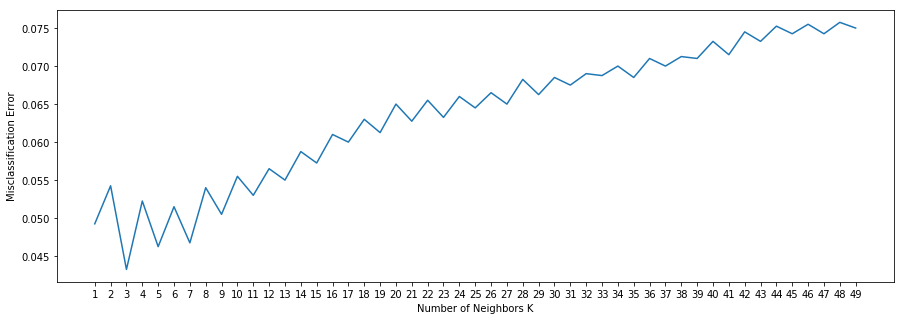

In [31]:
# Changing to misclassification error
MCE = [1 - x for x in cv_scores]

# Determining best k
optimal_k = myList[MCE.index(min(MCE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(myList, MCE)
plt.xticks(np.arange(1, 50, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Method-2: GridSearch Cross validation

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance. 

While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training

### K-fold Cross Validation

#### 1. Use the GridSearchCV 

In [32]:
parameters = {'n_neighbors':list(range(2,15))}

clf = GridSearchCV(KNeighborsClassifier(algorithm = 'auto', metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=10)

clf.fit(X=X_train, y=y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   52.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [34]:
knn_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.95675 {'n_neighbors': 3}


#### 2. Predict on the test data using the best model

In [ ]:
y_pred_test=knn_model.predict(X_test)

#### 3. Compute confusion matrix to evaluate the accuracy of the classification 

In [ ]:
print(confusion_matrix(y_test, y_pred_test))

#### 4. Accuracy classification score

In [ ]:
print(accuracy_score(y_test,y_pred_test))

---

## Activity 2: Regression 

#### 1. Import KNeighborsRegressor (from Sklearn)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

#### 2. Randomly generate a dataframe of 1000 rows and 4 columns. Consider the 3 columns as the independent variables and the 4th column as Target

In [54]:
data  = pd.DataFrame(np.random.randint(1,50,size=(1000, 4)), columns=list('ABCT'))

#### 3. Displaying the first 5 recods

In [55]:
data.head(20)

,A,B,C,T
0,18,37,43,21
1,37,25,13,31
2,39,48,10,5
3,5,2,34,5
4,26,18,47,27
5,43,8,41,44
6,10,5,45,44
7,8,34,20,35
8,16,35,2,45
9,28,7,31,5


#### 4. Split the data into train and test using the train_test_split() function.

In [56]:
train, test = train_test_split(data, test_size=0.2)
print(train.shape, test.shape)

(800, 4) (200, 4)


#### 5. Extract the target column from train and test datasets

In [57]:
y_train = train["T"]

In [58]:
y_test = test["T"]

#### 6. Normalize the independent variables using MinMaxScaler() in both train and test.

In [59]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train.iloc[:,:3])
stdtrain = pd.DataFrame(scaler.transform(train.iloc[:,:3]), columns=list("abc"))
stdtest = pd.DataFrame(scaler.transform(test.iloc[:,:3]), columns=list("abc"))

#### 7. Displaying the first 5 records from the normalized data.   

In [60]:
print(stdtrain.head(5))
print(stdtest.head(5))

          a         b         c
0  0.875000  0.395833  0.791667
1  0.166667  0.229167  0.145833
2  0.729167  0.687500  0.333333
3  0.750000  0.375000  0.562500
4  0.791667  1.000000  0.708333
          a         b         c
0  0.791667  0.083333  0.604167
1  0.395833  0.291667  0.958333
2  0.687500  0.625000  0.666667
3  0.750000  0.291667  0.416667
4  0.687500  0.583333  0.083333


#### 8. Display the dimensions for normalised train and test datasets.

In [61]:
print(stdtrain.shape)
print(y_train.shape)
print(stdtest.shape)
print(y_test.shape)

(800, 3)
(800,)
(200, 3)
(200,)


#### 9. Build the KNN Regression Model

In [62]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5, metric = "euclidean")
knn.fit(stdtrain, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [63]:
predictions = knn.predict(stdtest)

In [64]:
def mse(predictions,y):
    mse = (((predictions - y) ** 2).sum()) / len(predictions)
    return mse

In [65]:
mse(predictions,y_test)

258.7934